<a href="https://colab.research.google.com/github/cunhajessica/Inteligencia_Antificial_na_saude_de_fetos/blob/main/Intelig%C3%AAncia_artificial_auxiliando_na_sa%C3%BAde_de_beb%C3%AAs%2C_antes_mesmo_de_nascer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
by Jéssica Cunha


---

###**O que você vai ver neste projeto?**
*   Como verificar a **saúde de fetos** na maternidade com **inteligência artificial**
*   Um relatório automatizado de análise exploratória dos dados (**Pandas_profiling**).
*   Como utilizar o **Pycaret** com Auto Machine Learning (AutoML)
*   O que é um algoritmo de **Classificação**. 


#**Inteligência artificial auxiliando na saúde de bebês, antes mesmo de nascer**

O terceiro Objetivo de Desenvolvimento Sustentável das Nações Unidas é a **Saúde e bem-estar**: *assegurar uma vida saudável e promover o bem-estar para todos, em todas as idades.* A ONU espera que, até 2030, os países acabem com as mortes evitáveis ​​de recém-nascidos e crianças menores de 5 anos, em todos os países. 
De acordo com os Indicadores Brasileiros para os Objetivos de Desenvolvimento Sustentável, a mortalidade neonatal no Brasil representa 88 óbitos a cada 1000, em 2020. Veja mais sobre estes dados [aqui](https://odsbrasil.gov.br/objetivo3/indicador322).


<p align="left"><img src="https://img.freepik.com/fotos-gratis/filha-beijando-a-barriga-da-mae-gravida-durante-o-monitoramento-fetal_53876-137556.jpg?w=740&t=st=1662080685~exp=1662081285~hmac=ae6fe5b28792516233c4343e3e862f26f33f8d7e51bf1f368bdf9b0cf9567326" width="70%"></p>


A grande maioria dessas mortes ocorre em locais com poucos recursos e a maioria poderia ter sido evitada. O **Cardiotocograma (CTG)** é uma opção simples e de baixo custo para avaliar a **saúde fetal**, permitindo aos profissionais de saúde atuar na prevenção da mortalidade infantil. O próprio equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, esclarecendo assim a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas, podendo avaliar a vitalidade fetal.

O Cardiotocograma é feito com a gestante deitada, posicionando cintos sensores ao redor do abdomem que captam as informações menionadas acima.

*O objetivo deste projeto é desenvolver um algoritmo de machine learning para classificar o estado de saúde de fetos na maternidade, através dos resultados do Cardiograma, auxiliando na redução da mortalidade infantil.*


### **Obtenção dos dados**

Os dados foram obtidos através da plataforma do Kaggle, nomeados como: [Fetal Health Classification](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?select=fetal_health.csv). 
Este conjunto de dados contém 2126 registros de características extraídas de exames de cardiotocograma, que foram então classificados por três obstetras especialistas em 3 classes:

* Normal, mencionado como 1.
* Suspeito, mencionado como 2.
* Patológico, mencionado como 3.

Não há muitas informações a respeito desse dataset, assim como, o significado das variáveis. No entanto, através de pesquisas sobre a saúde de fetos, foi possível interpretar as variáveis e seguir com as análises.

### Dicionário das variáveis:

* `baseline value`: Linha de Base da Frequência Cardíaca Fetal (FCF) por segundo.
* `accelerations`: número de acelerações da FCF por segundo.
* `fetal_movement`: número de movimentos do feto por segundo.
* `uterine_contractions`: número de contrações uterinas por segundo.
* `light_decelerations`: número de desacelerações leves da FCF por segundo.
* `severe_decelerations`: número de desacelerações agudas da FCF por segundo.
* `prolongued_decelerations`: número de desacelerações prolongadas da FCF por segundo.
* `abnormal_short_term_variability`: porcentagem do tempo com variabilidade anormal da FCF por curtos períodos.
* `mean_value_of_short_term_variability`: média da variabilidade da FCF em curtos períodos.
* `percentage_of_time_with_abnormal_long_term_variability`: porcentagem do tempo com variabilidade anormal da FCF por longos períodos.
* `mean_value_of_long_term_variability`: média da variabilidade da FCF em longos períodos.
* `histogram_width`: Largura do histograma feito usando todos os valores de um registro de FCF.
* `histogram_min`: mínimo valor da FCF medida.
* `histogram_max`: máximo valor da FCF medida.
* `histogram_number_of_peaks`: número de picos do histograma da FCF.
* `histogram_number_of_zeroes`: número de zeros do histograma da FCF.
* `histogram_mode`: modo dos valores medidos da FCF.
* `histogram_mean`: média dos valores medidos da FCF.
* `histogram_median`: mediana dos valores medidos da FCF.
* `histogram_variance`: variância dos valores medidos da FCF.
* `histogram_tendency`: tendência dos valores medidos da FCF.
* `fetal_health`: Saúde do feto. Código de classe do estado fetal: Normal (1), Suspeito (2) e Patológico (3).

Referência dos dados acima: [Use of Machine Learning Algorithms for Prediction of Fetal Risk using Cardiotocographic Data](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/)

###**Análise Exploratória dos dados**

In [ ]:
# importando pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignorar as warnings
import warnings
warnings.filterwarnings('ignore')

Conforme podem ver abaixo, os dados foram disponibilizados no Github para facilitar no momento da reprodução deste dataset.

In [ ]:
# carregando o conjunto de dados
data = pd.read_csv("https://raw.githubusercontent.com/cunhajessica/Inteligencia_Antificial_na_saude_de_fetos/main/fetal_health.csv")

Antes de qualquer coisa vamos verificar a quantidade de colunas e linhas do conjunto de dados e verificar o tipo de cada variável.

In [ ]:
# verificando os dados
print("Linhas: ",data.shape[0],"\nVariáveis: ", data.shape[1])
data.head()

Linhas:  2126 
Variáveis:  22


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
#tipos de cada variável
pd.DataFrame(data.dtypes, columns=['Tipo da Variável'])

,Tipo da Variável
baseline value,float64
accelerations,float64
fetal_movement,float64
uterine_contractions,float64
light_decelerations,float64
severe_decelerations,float64
prolongued_decelerations,float64
abnormal_short_term_variability,float64
mean_value_of_short_term_variability,float64
percentage_of_time_with_abnormal_long_term_variability,float64


Através do Pandas Profiling vamos verificar um mais de informações sobre os dados.

## *Obs.: O GitHub impede a execução do relatório dinâmico do Pandas Profiling por questão de processamento, caso queira verificar o relatório completo, por favor veja o projeto diretamente pelo [Colab](https://colab.research.google.com/drive/1OtyzS2JdpOqJIAZRDtOUMbhg312pPfrz?usp=sharing).*

In [ ]:
#istalando pacotes para o pandas_profiling
!pip install pandas_profiling --upgrade -q
!pip install markupsafe==2.0.1 -q

     |████████████████████████████████| 325 kB 12.7 MB/s 
     |████████████████████████████████| 102 kB 69.7 MB/s 
     |████████████████████████████████| 9.9 MB 50.2 MB/s 
     |████████████████████████████████| 690 kB 65.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 4.7 MB 59.0 MB/s 
     |████████████████████████████████| 296 kB 71.9 MB/s 


In [ ]:
#importar pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
#criar ProfileReport
report = ProfileReport(data)

#criar visualização iframe
report.to_notebook_iframe()

**Algumas considerações importantes identificadas no relatório gerado pelo Pandas Profiling?**


* O dataset **não possui dados nulos**.
* A variável **fetal_health** contém **1655 fetos** classificados como **normal**, **295 fetos** como **suspeito** e **176 fetos** classificado como **patológico**.
* A variável **fetal_health** (saúde fetal) possui uma **alta correlação** com a variável **prolongued_decelerations** (desacelerações prolongadas da frequência cardíaca do feto).

In [ ]:
#verificar as colunas existentes no dataset
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
#verificando a quantidade de itens de classificação
np.unique(data.fetal_health)

array([1., 2., 3.])

Para evitar problemas com a classificação, iremos mudar as classes da coluna alvo para 0, 1 e 2, indicando normal, suspeito ou patológico, respectivamente. Isso porque, nos módulos de NumPy utlizados pelo PyCaret, o index 0 é sempre o primeiro nos vetores.

In [ ]:
data['fetal_health'].replace({1.0: 0, 2.0: 1, 3.0: 2}, inplace=True)
np.unique(data.fetal_health)

array([0., 1., 2.])

In [ ]:
#alterando o tipo da coluna de float para int
data['fetal_health'] = data['fetal_health'].astype(int)
np.unique(data.fetal_health)

array([0, 1, 2])

In [ ]:
#Porcentagens de cada saúde fetal
normal = (data[data.fetal_health == 0].shape[0])/(data.shape[0])*100
suspeito = (data[data.fetal_health == 1].shape[0])/(data.shape[0])*100
patologico = (data[data.fetal_health == 2].shape[0])/(data.shape[0])*100

print('Porcentagem de fetos NORMAIS: {:.1f} %'.format(normal))
print('Porcentagem de fetos SUSPEITOS: {:.1f} %'.format(suspeito))
print('Porcentagem de fetos PATOLÓGICOS: {:.1f} %'.format(patologico))

Porcentagem de fetos NORMAIS: 77.8 %
Porcentagem de fetos SUSPEITOS: 13.9 %
Porcentagem de fetos PATOLÓGICOS: 8.3 %


Pela análise acima, podemos constatar que a saúde dos fetos estão divididas da seguinte maneira.

* Normais: 77,8% (1655 fetos)
* Suspeitos: 13,9% (295 fetos)
* Patológicos: 8,3% (176 fetos)

Além disso, é importante observar que nos dados existem muito mais fetos saudáveis do que os que apresentam alguma tipo de patologia, sendo assim, será necessário balancear os dados. Para saber mais sobre dados balanceados, clique aqui.

##**Divisão dos dados**

Para iniciarmos a contrução do nosso modelo, vamos separar os dados em treino e teste.

*   **Dados de treino:** serve para treinar o modelo.
*   **Dados de teste:** usado somente no final, depois de o modelo estar pronto e otimizado, para ver a real performance deste modelo.

In [ ]:
# separando os dados em teste e treino
test = data.sample(frac=0.10, random_state=2)
train = data.drop(test.index)

#resetando os indices dos conjuntos de dados
test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
#verificando a separação dos dados
print('Dados de Treino:', train.shape)
print('Dados de Teste:', test.shape)

Dados de Treino: (1913, 22)
Dados de Teste: (213, 22)


Por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. Por isso, é importante que sempre que formos trabalhar com ele por aqui, façamos a instalação da ferramente e das ferramentas dependentes. Apesar das mensagens de erro, isso não impacta no desempenho do pycaret.

In [ ]:
# instalando as bibliotecas necessarias para o pycaret
!pip install pycaret==2.3.5 -q
!pip install pyyaml==5.4.1 -q
!pip install jinja2 -q
!pip install markupsafe==2.0.1 -q
!pip install scipy==1.2 --upgrade -q
from markupsafe import soft_unicode
import jinja2

     |████████████████████████████████| 288 kB 14.0 MB/s 
     |████████████████████████████████| 1.3 MB 64.4 MB/s 
     |████████████████████████████████| 17.0 MB 47.1 MB/s 
     |████████████████████████████████| 141 kB 74.4 MB/s 
     |████████████████████████████████| 6.8 MB 45.0 MB/s 
     |████████████████████████████████| 1.7 MB 43.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 40.4 MB/s 
     |████████████████████████████████| 4.8 MB 40.4 MB/s 
     |████████████████████████████████| 88 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 167 kB 27.7 MB/s 
     |████████████████████████████████| 25.9 MB 2.4 MB/s 
     |████████████████████████████████| 14.8 MB 45.9 MB/s 
     |████████████████████████████████| 1.6 MB 8.5 MB/s 
     |████████████████

Além disso, precisamos ativar o modo do Colab. Assim, conseguiremos utilizar as biblioteca aqui no Colab.

In [ ]:
# configurando para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
#importando os módulos do pycaret para classificação
from pycaret.classification import *

A função setup() é o primeiro passo ao executar o PyCaret, ela inicializa o ambiente no PyCaret e cria o pipeline de transformação para preparar os dados para o nosso modelo. Ela recebe dois parâmetros obrigatórios: Um dataframe do pandas e o nome da coluna alvo. Todos os outros parâmetros são opcionais, e são usados para customizar o pipeline de pré-processamento. Os parâmetros opcionais podem ser encontrados na documentação do Pycaret.

Ao rodar a célula o PyCaret oferece uma tabela mostrando as features e seus tipos inferidos, após a execução do setup(). Caso todos os tipos estejam corretos, podemos seguir em frente apertando a tecla enter. Caso contrário, deve-se digitar quit no espaço disponibilizado.

No nosso setup() estaremos normalizando os dados, conforme falamos, eles estão desbalanceados. Também, estaremos removendo as variáveis que tem uma extrema correlação (threshold = 0.9), utilizando a função remove_multicollinearity como True.

Por fim, deixamos o session_id como 2 para possibilitar que este notebook possa ser reproduzido sem alterações.

In [ ]:
#inicializando o pycaret com o Setup e mudando alguns parâmetros
clf = setup(data=train,target='fetal_health',session_id=2,
            normalize=True,remove_multicollinearity=True)

,Description,Value
0,session_id,2
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1913, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='fetal_health',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dummy', Dummify(target='fetal_health')),
                ('fix_perfect', Remove_100(target='fetal_health')),
         

Após fazer o pipeline, utilizamos a função `compare_models()`.
Essa função treina todos os modelos na biblioteca do PyCaret e os avalia usando  [cross-validation](https://towardsdatascience.com/cross-validation-430d9a5fee22), com número de folds iguais a 10, número que pode ser alterado, para calcular a média das métricas. 

A comparação é feita utilizando os valores padrão dos hiperparâmetros de cada modelo, imprimindo uma tabela que mostra as principais métricas para avaliação. 

Veja abaixo as principais [métricas para o modelo de regressão](https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96):

*   **Acurácia** - diz quantos de nossos exemplos foram de fato classificados corretamente, independente da classe.
*   **AUC** - calcula o erro Quadrático Médio.
*   **Precisão**  - Podemos entender a precisão como sendo a expressão matemática para a pergunta: dos exemplos classificados como positivos, quantos realmente são positivos?.
*   **Recall**  - dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas.
*   **F1** - média harmônica entre a Precisão e o Recall.
*   **Kappa** - É a relação entre os valores previstos e os valores reais.
*   **MCC** - A qualidade do modelo é medida considerando a matriz de confusão.

Neste caso, iremos levar em consideração a métrica **Precision** (precisão), para verificarmos o quanto os valores previstos estão próximos dos valores da base de dados. O parâmetro `n_select` retorna os 3 melhores modelos da comparação. As casas decimais são definidas pelo parâmetro `round`, por padrão ele mostra 4 casas decimais.

In [ ]:
#comparando os modelos de classificação de acordo com a métrica escolhida
best = compare_models(round=2,n_select=3,sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.94,0.99,0.88,0.95,0.94,0.84,0.85,0.22
gbc,Gradient Boosting Classifier,0.94,0.98,0.88,0.94,0.94,0.84,0.84,1.11
rf,Random Forest Classifier,0.93,0.98,0.84,0.93,0.93,0.81,0.81,0.62
et,Extra Trees Classifier,0.92,0.98,0.80,0.92,0.91,0.77,0.77,0.45
dt,Decision Tree Classifier,0.91,0.88,0.84,0.91,0.91,0.76,0.76,0.02
knn,K Neighbors Classifier,0.90,0.95,0.78,0.90,0.90,0.72,0.73,0.12
lr,Logistic Regression,0.89,0.97,0.78,0.89,0.89,0.71,0.71,0.32
nb,Naive Bayes,0.74,0.93,0.75,0.87,0.77,0.49,0.55,0.01
ada,Ada Boost Classifier,0.87,0.83,0.74,0.87,0.87,0.63,0.63,0.18
lda,Linear Discriminant Analysis,0.87,0.96,0.71,0.87,0.87,0.64,0.64,0.02


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0,

In [ ]:
#imprimindo os 3 melhores classificadores
print(best)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                        

Os melhores modelos idenficados foram:
* LGBMClassifier
* GradientBoostingClassifier
* RandomForestClassifier

Assim como no compare_models, no `create_model`, por padrão ele utiliza 10 fold, é possível mudar a quantidade de folds com uma validação cruzada conforme o valor desejado, porém, quanto mais folds for utilizado, mais lento será o processamento da operação. Iremos passar a função create_model para os 3 modelos.

In [ ]:
#criando o modelo LGBMClassifier
lgbm = create_model('lightgbm', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.93,0.99,0.83,0.94,0.93,0.80,0.81
1,0.96,0.99,0.96,0.96,0.96,0.90,0.90
2,0.95,0.99,0.85,0.95,0.95,0.86,0.86
3,0.95,0.98,0.89,0.95,0.95,0.85,0.86
4,0.96,0.99,0.89,0.95,0.95,0.87,0.88
5,0.93,0.99,0.85,0.93,0.93,0.81,0.81
6,0.94,0.98,0.89,0.94,0.94,0.84,0.84
7,0.96,0.99,0.91,0.95,0.95,0.88,0.88
8,0.93,0.97,0.81,0.92,0.92,0.79,0.80
9,0.95,0.99,0.88,0.95,0.95,0.85,0.85


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#criando o modelo GradientBoostingClassifier
gbc = create_model('gbc', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.94,0.97,0.85,0.94,0.94,0.83,0.83
1,0.96,0.99,0.94,0.96,0.96,0.88,0.88
2,0.94,0.99,0.84,0.94,0.94,0.83,0.83
3,0.94,0.96,0.87,0.94,0.94,0.83,0.83
4,0.95,0.98,0.90,0.95,0.95,0.85,0.86
5,0.95,1.00,0.87,0.95,0.95,0.85,0.85
6,0.95,0.98,0.91,0.95,0.95,0.86,0.86
7,0.95,0.99,0.91,0.95,0.95,0.86,0.86
8,0.92,0.96,0.83,0.91,0.91,0.77,0.78
9,0.95,0.98,0.88,0.95,0.95,0.85,0.85


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#criando o modelo RandomForestClassifier
rf = create_model('rf', round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.94,0.98,0.85,0.94,0.94,0.83,0.83
1,0.94,0.99,0.90,0.94,0.94,0.83,0.84
2,0.93,0.99,0.79,0.93,0.92,0.78,0.79
3,0.93,0.98,0.87,0.93,0.93,0.81,0.81
4,0.96,0.99,0.89,0.96,0.95,0.87,0.88
5,0.95,0.99,0.87,0.95,0.95,0.85,0.85
6,0.92,0.98,0.82,0.91,0.92,0.77,0.77
7,0.95,0.99,0.90,0.95,0.95,0.86,0.86
8,0.91,0.97,0.78,0.91,0.90,0.74,0.75
9,0.91,0.98,0.77,0.91,0.90,0.74,0.74


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


### **Tuning dos Modelos**

Quando um modelo é criado usando o `create_model()` ele usa os hiperparâmetros padrão para cada modelo. Para fazer o tuning desses parâmetros, usamos a função `tune_model()`. Nesse caso, as iterações são passadas pelo parâmetro `n_inter`, que por padrão são 10, como fold, em `create_model()`. No parâmetro `optimize`, passamos a métrica que desejamos avaliar, no caso Precision.

In [ ]:
# tuning de parâmetros do modelo LGBMClassifier
tuned_lgbm = tune_model(lgbm,round=2,optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.93,0.97,0.86,0.94,0.93,0.81,0.81
1,0.95,0.98,0.91,0.95,0.95,0.85,0.86
2,0.94,0.99,0.86,0.94,0.94,0.84,0.84
3,0.94,0.96,0.87,0.94,0.94,0.83,0.83
4,0.94,0.98,0.87,0.94,0.94,0.83,0.83
5,0.96,0.99,0.89,0.96,0.95,0.87,0.88
6,0.92,0.98,0.85,0.92,0.92,0.78,0.79
7,0.93,0.99,0.88,0.93,0.93,0.81,0.81
8,0.89,0.94,0.76,0.88,0.88,0.69,0.69
9,0.92,0.98,0.82,0.91,0.91,0.77,0.77


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=290, n_jobs=-1, num_leaves=4, objective=None,
               random_state=2, reg_alpha=0.0005, reg_lambda=0.7, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# tuning de parâmetros do modelo GradientBoostingClassifier
tuned_gbc = tune_model(gbc,round=2,optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.94,0.98,0.85,0.94,0.94,0.83,0.83
1,0.96,0.99,0.94,0.96,0.96,0.88,0.88
2,0.95,0.99,0.87,0.95,0.95,0.86,0.86
3,0.95,0.98,0.89,0.95,0.95,0.85,0.86
4,0.96,0.99,0.92,0.95,0.95,0.88,0.88
5,0.96,0.99,0.89,0.96,0.95,0.87,0.88
6,0.93,0.98,0.89,0.93,0.93,0.82,0.82
7,0.93,0.98,0.86,0.93,0.93,0.81,0.82
8,0.92,0.97,0.80,0.91,0.91,0.76,0.77
9,0.94,0.99,0.88,0.94,0.94,0.83,0.84


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.005, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# tuning de parâmetros do modelo RandomForestClassifier
tuned_rf = tune_model(rf,round=2,optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.90,0.97,0.89,0.91,0.91,0.75,0.76
1,0.92,0.98,0.94,0.93,0.92,0.80,0.80
2,0.91,0.99,0.84,0.93,0.91,0.78,0.78
3,0.93,0.98,0.90,0.93,0.93,0.82,0.82
4,0.91,0.98,0.91,0.93,0.92,0.78,0.79
5,0.93,0.99,0.92,0.94,0.93,0.83,0.83
6,0.93,0.97,0.94,0.93,0.93,0.81,0.82
7,0.92,0.98,0.89,0.94,0.92,0.80,0.80
8,0.87,0.95,0.80,0.88,0.87,0.68,0.68
9,0.92,0.97,0.88,0.92,0.92,0.79,0.79


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=-1, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### **Verificando o resultado de cada modelo**

Essa análise é feita para que possamos escolher o melhor modelo para utilizar nos dados de teste. Para isso utilizamos a função `predict_model()`, do PyCaret.

In [ ]:
#previsão para o modelo LGBMClassifier
predict_model(tuned_lgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=290, n_jobs=-1, num_leaves=4, objective=None,
               random_state=2, reg_alpha=0.0005, reg_lambda=0.7, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.939,0.9779,0.8901,0.9393,0.939,0.8318,0.8318


In [ ]:
#previsão para o modelo GradientBoostingClassifier
predict_model(tuned_gbc);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.005, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing displa

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9443,0.9812,0.9057,0.9447,0.9444,0.8472,0.8472


In [ ]:
#previsão para o modelo RandomForestClassifier
predict_model(tuned_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=-1, oob_score=False,
                       random_state=2, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9024,0.974,0.9145,0.9248,0.9088,0.76,0.7708


Avaliando as métricas dos modelos, percebemos que o segundo modelo apresenta os melhores valores de Precision. Desta forma, vamos optar em utilizá-lo.

Antes de finalizarmos o modelo, segue uma breve descrição sobre o GBC.

###**Gradient Boosting**
O algoritmo Gradient Boosting é uma técnica de aprendizado de máquina para problemas de regressão e classificação, que produz um modelo de previsão na forma de um conjunto de modelos de previsão fracos, geralmente árvores de decisão. Ele constrói o modelo em etapas, como outros métodos de reforço, e os generaliza, permitindo a otimização de uma função de perda diferenciável arbitrária. Para saber um pouco mais sobre esse modelo, clique [aqui](https://medium.com/equals-lab/uma-breve-introdu%C3%A7%C3%A3o-ao-algoritmo-de-machine-learning-gradient-boosting-utilizando-a-biblioteca-311285783099#:~:text=Gradient%20Boosting,-O%20algoritmo%20Gradient&text=O%20objetivo%20do%20algoritmo%20%C3%A9,chamado%20de%20taxa%20de%20aprendizagem.).

Abaixo podemos ver alguns gráficos interessantes do modelo.

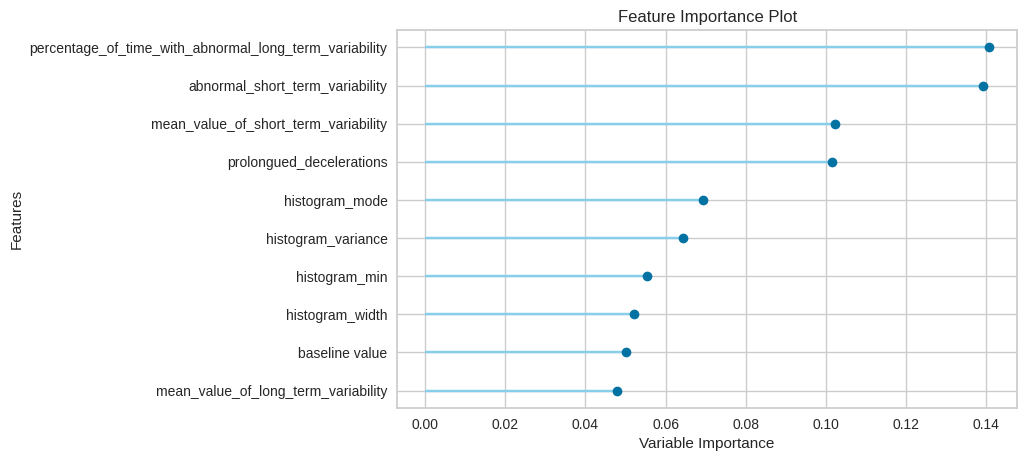

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# feature importances
plot_model(tuned_gbc, plot='feature')

No plot acima podemos ver as variáveis com maior importância para a classificação do modelo.

In [ ]:
#graficos interativos 
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.005, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

O último passo será utilizar a função `finalize_model()` com o objetivo de treinar o modelo em todo o conjunto de dados inicial de treino, antes de ser feito o deploy para produção.

In [ ]:
#finalizando o modelo para que ele seja usado nas previsões
final_model = finalize_model(tuned_gbc)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.005, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None)
INFO:logs:Finalizing GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', ma

##**Fazendo previsões no modelo**

Anteriormente separamos o conjunto de dados em treino e teste. Construímos o modelo utilizando os dados de treino, porém agora, com os dados de teste que ainda não foram vistos, veremos a real performance do modelo.

In [ ]:
#previsão de dados não vistos pelo modelo
unseen_predictions = predict_model(final_model,data=test)
#unseen_predictions.head(10).round(2)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.005, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing displa

A coluna `Label` é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo GBC.
Em seguida vamos verificar os valores que a previsão não foi correta.

In [ ]:
#verificando as classificações da variável fetal_health diferentes da previsão (Label)
classif_diferente = unseen_predictions[~(unseen_predictions['fetal_health'] == unseen_predictions['Label'])]
print('Foram encontradas {} entradas em que as previsões foram diferentes dos valores reais.'.format(classif_diferente.shape[0]))
print('Estas classificações diferentes representam {:.2f}% da base de dados de teste.'.format(classif_diferente.shape[0] * 100 /unseen_predictions.shape[0]))

Foram encontradas 11 entradas em que as previsões foram diferentes dos valores reais.
Estas classificações diferentes representam 5.16% da base de dados de teste.


#**Conclusões**

*   O modelo ainda pode ser melhorado, porém, a ferramenta **Pycaret** se mostrou muito eficiente.
* A ferramenta **Pandas Profiling** se mostrou uma forma rápida para verificar informações relevantes do conjunto de dados.
*   Apesar do **Cardiotocograma** dar uma noção da saúde do feto, é de extrema importância que seja feito um **acompanhamento médico** para uma melhor avaliação.
*  O modelo obteve um **bom desempenho**, tendo uma **inconsistência de apenas 5,16%**. Além de não ter previsto nenhum feto patológico como sendo saudável.


###**Referências**:

Ayres de Campos et al. (2000) SisPorto 2.0 Um Programa para Análise
Automatizada de Cardiotocogramas. J Matern Fetal Med 5:311-318 ([link](https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9) )